In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

Data Preparation

In [2]:
# read in crypocurrency csv dataset
file = os.path.join("crypto_data.csv")

df = pd.read_csv(file)

df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
#filter for currencies that are currently being traded
df2 = df[df.IsTrading == True]

In [6]:
#drop the IsTrading column from the dataframe
df2.drop('IsTrading', axis=1, inplace=True)

C:\Users\Graciela\anaconda3\envs\Pythondata\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#Remove all rows that have at least one null value
df2.dropna(inplace=True)
df2.isnull().sum().sum()

C:\Users\Graciela\anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [9]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df2 = df[df.TotalCoinsMined > 0]



In [10]:
#delete the CoinName from the original dataframe
df_dropped_names = df2.drop(['Unnamed: 0', 'CoinName'], axis = 1)

In [11]:
df_dropped_names['TotalCoinSupply'] = df_dropped_names['TotalCoinSupply'].apply(lambda x: float(x))
df_dropped_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 1248
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        577 non-null    object 
 1   IsTrading        577 non-null    bool   
 2   ProofType        577 non-null    object 
 3   TotalCoinsMined  577 non-null    float64
 4   TotalCoinSupply  577 non-null    float64
dtypes: bool(1), float64(2), object(2)
memory usage: 23.1+ KB


In [12]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
#use Pandas to create dummy variables
df_dummies = pd.get_dummies(df_dropped_names)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 1248
Columns: 102 entries, IsTrading to ProofType_dPoW/PoW
dtypes: bool(1), float64(2), uint8(99)
memory usage: 69.9 KB


In [13]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)

In [14]:
scaled_data[:1]

array([[ 0.29083753, -0.11450078, -0.15072489, -0.04166667, -0.04166667,
        -0.04166667, -0.05897678, -0.0934947 , -0.04166667, -0.05897678,
        -0.05897678, -0.04166667, -0.04166667, -0.18949048, -0.05897678,
        -0.0934947 , -0.04166667, -0.11081833, -0.0722944 , -0.04166667,
        -0.04166667, -0.1518211 , -0.04166667, -0.13280318, -0.04166667,
        -0.04166667, -0.0835512 , -0.05897678, -0.04166667, -0.04166667,
        -0.04166667, -0.05897678, -0.04166667, -0.0835512 , -0.0934947 ,
        -0.10250796, -0.04166667, -0.1258772 , -0.13280318, -0.1518211 ,
        -0.04166667, -0.0835512 , -0.04166667, -0.04166667, -0.0722944 ,
        -0.17423301, -0.04166667, -0.04166667, -0.04166667, -0.0722944 ,
        -0.16888013, -0.30802055, -0.04166667, -0.0934947 , -0.0934947 ,
        -0.05897678,  1.39963365, -0.04166667, -0.04166667, -0.04166667,
        -0.0835512 , -0.04166667, -0.04166667, -0.04166667, -0.04166667,
        -0.04166667, -0.05897678, -0.04166667, -0.0

Dimensionality Reduction

In [15]:
#Perform dimensionality reduction with PCA
#preserve 90% of the explained variance in dimensionality reduction PCA(n_components=0.90)

pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [16]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results
#run t-SNE on the principal components: the output of the PCA transformation

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)


C:\Users\Graciela\anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Graciela\anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Graciela\anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tryin

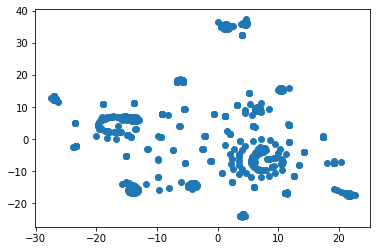

In [17]:
#create a scatter plot of the t-SNE output

df2['x'] = transformed_features[:,0]
df2['y'] = transformed_features[:,1]
df2['class'] = df['IsTrading']


plt.scatter(df2['x'], df2['y'])
plt.show()

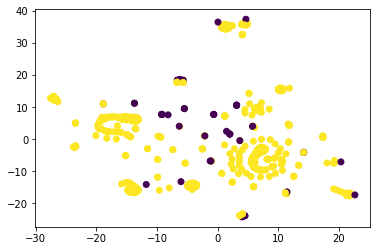

In [18]:
plt.scatter(df2['x'], df2['y'],c=df2['class'])
plt.show()

Cluster Analysis with k-Means

In [20]:
#Create an elbow plot to identify the best number of clusters.
#Use a for-loop to determine the inertia for each k between 1 through 10.
#Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Graciela\anaconda3\envs\Pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,53463.524547
1,2,52306.673635
2,3,51519.931856
3,4,49787.823302
4,5,49145.687079


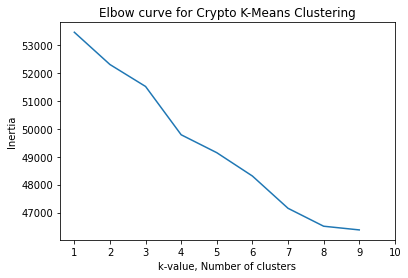

In [25]:
 # Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('k-value, Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Crypto K-Means Clustering')
plt.show()

In [22]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [65]:

new_df = pd.DataFrame(pca_transformed_data)

In [77]:

clusters = get_clusters(8, new_df)
clusters

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,class
0,-0.315267,1.139747,-0.539095,0.001185,4.358061e-14,-1.319933e-14,-4.008147e-14,-0.013040,-1.216674,-0.016166,...,-1.558884e-15,5.777217e-16,-2.982927e-15,1.210527e-15,1.300247e-15,9.562151e-16,2.916104e-15,-4.850556e-16,-1.089589e-15,0
1,-0.297948,1.139987,-0.539621,0.001173,4.364047e-14,-1.353047e-14,-3.938129e-14,-0.013687,-1.220117,-0.020026,...,6.380112e-16,1.442343e-15,-4.816300e-15,2.304407e-15,8.555843e-16,-1.422502e-15,1.610994e-15,-6.980023e-16,2.152580e-15,0
2,2.431975,1.718655,-0.624787,0.004572,2.168985e-13,-7.456577e-14,-2.161041e-13,-0.063990,-1.569340,-0.702580,...,3.931334e-14,-3.001717e-14,1.044710e-13,-1.706222e-14,8.093283e-15,1.470711e-15,3.214281e-14,5.632589e-14,-5.015491e-15,0
3,-0.122960,-1.351479,0.188419,-0.001181,-6.002240e-14,2.014664e-14,6.091974e-14,0.001735,0.191772,0.253010,...,-5.371061e-15,-4.586759e-15,1.036522e-14,-1.324793e-14,-3.148930e-16,8.883430e-15,1.480444e-15,-1.158330e-15,9.149703e-15,0
4,-0.124692,-2.112378,0.365421,-0.001611,-7.323975e-14,2.733548e-14,7.303458e-14,0.033121,0.362755,0.197864,...,-1.508260e-14,2.096529e-14,2.326051e-14,-9.095657e-14,-1.182123e-13,1.000709e-13,-2.252383e-14,1.480068e-14,3.168594e-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.313239,1.139640,-0.539138,0.001187,4.445241e-14,-1.368057e-14,-4.027646e-14,-0.013067,-1.217147,-0.016671,...,4.356023e-16,1.872400e-15,-3.957156e-15,1.994196e-15,8.202511e-16,-5.845703e-16,1.761941e-15,-6.259244e-16,1.573382e-15,0
573,0.337562,-2.356317,0.387138,-0.001201,-4.025654e-14,1.440872e-14,4.380100e-14,0.022643,-0.023961,0.061490,...,1.739647e-15,-7.185193e-14,-3.393444e-13,7.416412e-13,-1.137628e-13,1.926719e-13,1.716621e-13,-1.994782e-14,-8.801048e-14,0
574,-0.140916,-2.078000,0.378283,-0.001618,-7.012071e-14,2.395100e-14,7.095494e-14,0.035312,0.471347,0.224077,...,3.443922e-15,-2.551328e-15,1.895285e-15,-6.552304e-16,1.494917e-15,-1.949867e-15,5.492053e-15,-9.808492e-16,2.065937e-15,0
575,-0.268282,0.791025,-0.233167,0.000401,1.119738e-14,-3.810486e-15,-1.059749e-14,-0.024578,0.970131,-0.708950,...,3.683501e-16,-7.571350e-16,-6.598463e-15,4.865412e-15,3.036672e-15,-6.153056e-17,2.980805e-15,-6.452257e-16,2.498487e-15,0


In [80]:
def show_clusters(df):
    plt.scatter( df[0],df[1], c=df['class'])
    plt.xlabel('Total Coins Mined')
    plt.ylabel('Total Coin Supply')
    plt.show()

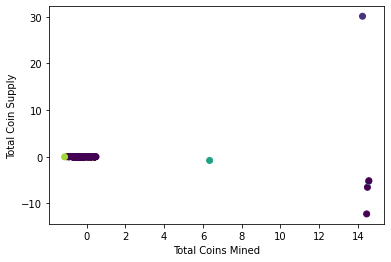

In [79]:
 show_clusters(clusters)

Recommendation

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?